#Table of Contents for this Notebook.
Note: some work is reproduceable, some work is my data exploration.  I kept my data exploration functions to show my work, but these may not be reproducable, nor is it necessary to reproduce this work.
To read the notebook properly, pay attention to the following markdown fields.

Sections 02 - 08 can be reproduced by importing original dataset.

Section 09 can be reproduced by importing data sets created in Section 08.

#01 - Import Libraries.

#02 - Import Data -- this is to create project folder path and import original data set.

#03 - Answer to Task Question: Implications of Data Security and PII.

#04 - Answer to Task Question: Create Regional Segmentation.

#05 - Answer to Task Question: Spending habits by Region.

#06 - Answer to Task Question: Create Low Activity Flag and exclude in Subset.

#07 - Answer to Task Question: Create Audience segments to recommend to marketing teams.  Item 07 is my data exploration.

#08 - Answer to Task Question: Create Audience segments, aggregated comparisons, and visualizations.  This is my final answer.

#09 - Visualizations for Audience Segments.  This is my final answer.

#01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#02 Import Data

In [2]:
#define path to main Instacart project folder
InstacartProjectFolder=r'C:\Users\user\Instacart Basket Analysis 02042023'

In [3]:
#import ords_prods_cust combined data set
ords_prods_cust=pd.read_pickle(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','ords_prods_cust_merge.pkl'))

In [ ]:
ords_prods_cust.head()

#03 Implications for Data Security and PII

This new data set contains information that will identify customers.  This is most specifically Last Name, State, Age, and Income.  The combination of this information can reveal a specific person and therefore it must be protected with proper security to protect the privacy of the individual.  This security must include: giving access only to authorized people inside the company who need to know this information for the sake of doing their job, keeping the data inside databases and servers that are protected from hackers or other people who may try to steal this information, and it must only be shared across networks that are encrypted and accessed only inside the company.

#04 Create Regional Segmentation using USA Regions as defined in Wikipedia
https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States
- Northeast
    Maine
    New Hampshire
    Vermont
    Massachusetts
    Rhode Island
    Connecticut
    New York
    Pennsylvania
    New Jersey
- Midwest
    Wisconsin
    Michigan
    Illinois
    Indiana
    Ohio
    North Dakota
    South Dakota
    Nebraska
    Kansas
    Minnesota
    Iowa
    Missouri
- South
    Delaware
    Maryland
    District of Columbia
    Virginia
    West Virginia
    North Carolina
    South Carolina
    Georgia
    Florida
    Kentucky
    Tennessee
    Mississippi
    Alabama
    Oklahoma
    Texas
    Arkansas
    Louisiana
- West
    Idaho
    Montana
    Wyoming
    Nevada
    Utah
    Colorado
    Arizona
    New Mexico
    Alaska
    Washington
    Oregon
    California
    Hawaii
    
Can be reproduced by importing original data set.

In [4]:
# step 1 - add flag for Northeast region
ords_prods_cust.loc[(ords_prods_cust['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'])),'region_flag'] = 'northeast'

In [ ]:
#check values assigned to new region column
ords_prods_cust['region_flag'].value_counts(dropna=False)

In [5]:
# step 2 - add flag for midwest region
ords_prods_cust.loc[(ords_prods_cust['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'])),'region_flag'] = 'midwest'

In [ ]:
#check values assigned to new region column
ords_prods_cust['region_flag'].value_counts(dropna=False)

In [6]:
# step 3 - add flag for south region
ords_prods_cust.loc[(ords_prods_cust['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'])),'region_flag'] = 'south'

In [7]:
#check values assigned to new region column
ords_prods_cust['region_flag'].value_counts(dropna=False)

south        3236318
NaN          2487728
midwest      2280386
northeast    1716666
Name: region_flag, dtype: int64

In [8]:
# step 4 - add flag for west region
ords_prods_cust.loc[(ords_prods_cust['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'])),'region_flag'] = 'west'

In [9]:
#check values assigned to new region column
ords_prods_cust['region_flag'].value_counts(dropna=False)

south        3236318
west         2487728
midwest      2280386
northeast    1716666
Name: region_flag, dtype: int64

#Output shows value counts for the region_flag contains zero NaN.  Therefore all rows have been labeled according to the region.

In [10]:
#export to pkl with region flags
ords_prods_cust.to_pickle(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'ords_prods_cust_regionflag.pkl'))

#05 Determine spending habits by region.

Can be reproduced by data set with region_flag.

In [ ]:
#use crosstab function to compare region_flag to frequency_flag
crosstab = pd.crosstab(ords_prods_cust['region_flag'], ords_prods_cust['frequency_flag'], dropna = False)

In [ ]:
#copy new crosstab to paste into excel
crosstab.to_clipboard()

#output to excel --> see corresponding spreadsheet CustomerFrequencybyRegion.xls
This output and bar chart shows that in general, the most frequent customers are in the South and West.

In [ ]:
#familiarize myself with spending_flag values
ords_prods_cust['spending_flag'].head()

In [ ]:
#use crosstab function to compare region_flag to spending_flag
crosstab2 = pd.crosstab(ords_prods_cust['region_flag'], ords_prods_cust['spending_flag'], dropna = False)

In [ ]:
#copy to excel
crosstab2.to_clipboard()

#output to excel --> see corresponding spreadsheet SpendingbyRegion - this shows the South has the highest number of high spenders, followed by west and midwest, each of which have approximately the same number of high spenders.  Northeast has the lowest number of high spenders.

#06 Create new Low Activity Flag for customers with less than 5 orders, create new data set excluding these customers.

Can be reproduced by importing original data set.

In [ ]:
#step 1 group by user_id and aggregate by max order_number
ords_prods_cust.groupby('user_id').agg({'order_number': ['max']})

In [ ]:
#check if dataset already has max_order number
ords_prods_cust.columns


In [ ]:
ords_prods_cust[['user_id','max_order']].head()

In [ ]:
# step 2 - add flag for low activity
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low'

In [ ]:
#check values in activity_flag
ords_prods_cust['activity_flag'].value_counts(dropna=False)

In [ ]:
#create subset without low activity rows
normal_act =  ords_prods_cust[ords_prods_cust['activity_flag']!="low"]

In [ ]:
#check rows in new subset
normal_act.shape

#output shows number of rows in new subset equals the number of rows with no value in activity_flag 9289401. Therefore, this is the correct subset

In [ ]:
#export to pickle
normal_act.to_pickle(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'orders_prods_cust_normact.pkl'))

#To make more memory free, I will now end my work and reopen dataset based on last task only.

In [ ]:
#import ords_prods_cust with normal activity only
ords_prods_cust=pd.read_pickle(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','orders_prods_cust_normact.pkl'))

#07 Create Profile based on age, income, and contents of purchase, also use orders_day_of_week or hour_of_day.

Ideas to create customer segments
Age:
Use descriptive statistics to find upper and lower quartiles
create flag for each group

Income
Use descriptive statistics to find upper and lower quartiles
create flag for each group

Contents of purchase
use department_id as dependent variable on age groups and income groups
find most popular/least popular for each age and income group

Day of week
use crosstab to find day of week by age and by income

Hour of Day
use crosstab to find hour of day by age and by income


Go to item 08 for final answer to data exploration.


#create age segments

In [ ]:
#step 1 find quartiles of age 
ords_prods_cust['age'].describe()

#output shows
1st quarter = 18 to 33
2nd quarter = 34 to 49
3rd quarter = 50 to 65
4th quarter = 66 and over

In [11]:
#step 2 create new column with flag
ords_prods_cust.loc[(ords_prods_cust['age'] >= 18) & (ords_prods_cust['age'] <= 33) , 'age_group'] = '18 to 33'

In [ ]:
#check value counts on age_group
ords_prods_cust['age_group'].value_counts(dropna=False)

In [12]:
#step 3 add additional age groups
ords_prods_cust.loc[(ords_prods_cust['age'] >= 34) & (ords_prods_cust['age'] <= 49) , 'age_group'] = '34 to 49'
ords_prods_cust.loc[(ords_prods_cust['age'] >= 50) & (ords_prods_cust['age'] <= 65) , 'age_group'] = '50 to 65'
ords_prods_cust.loc[(ords_prods_cust['age'] >= 66) , 'age_group'] = '66 and over'

In [ ]:
#check value counts on age_group
ords_prods_cust['age_group'].value_counts(dropna=False)

#output shows no NaN or blank values, therefore all rows have been properly flagged for age_group

#create income segments

In [ ]:
#step 1 find income quartiles with descriptive statistics
ords_prods_cust['income'].describe()

#output shows
1st quarter = 25903 to 67300
2nd quarter = 67301 to 96779
3rd quarter = 96780 to 128138
4th quarter = 128139 and over

In [13]:
#step 2 create income flag
ords_prods_cust.loc[(ords_prods_cust['income'] >= 25903) & (ords_prods_cust['income'] <= 67300) , 'income_group'] = 'Below 67300'
ords_prods_cust.loc[(ords_prods_cust['income'] >= 67301) & (ords_prods_cust['income'] <= 96779) , 'income_group'] = '67301 to 96779'
ords_prods_cust.loc[(ords_prods_cust['income'] >= 96780) & (ords_prods_cust['income'] <= 128138) , 'income_group'] = '96780 to 128138'
ords_prods_cust.loc[(ords_prods_cust['income'] >= 128139) , 'income_group'] = '128139 and over'

In [ ]:
#check values in income_group
ords_prods_cust['income_group'].value_counts(dropna=False)

#output shows no NaN or blank values, therefore all rows have been properly flagged for income_group

#create crosstab of age_group to department and copy to excel


In [14]:
#export data set will all flags
ords_prods_cust.to_pickle(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'orders_prods_cust_flags.pkl'))

In [ ]:
#import ords_prods_cust with flags
ords_prods_cust=pd.read_pickle(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','orders_prods_cust_flags.pkl'))

In [ ]:
#find fields relevant to department and items purchased
ords_prods_cust.columns

In [ ]:
ords_prods_cust['product_name'].value_counts(dropna=False)

In [ ]:
ords_prods_cust['department_id'].value_counts(dropna=False)

In [ ]:
ords_prods_cust['Unnamed: 0'].value_counts(dropna=False)

cross_age_depid = pd.crosstab(ords_prods_cust['age_group'], ords_prods_cust['department_id'], dropna = False)

In [ ]:
#create crosstab age to department_id
cross_age_depid = pd.crosstab(ords_prods_cust['age_group'], ords_prods_cust['department_id'], dropna = False)

In [ ]:
#copy to excel
cross_age_depid.to_clipboard()

#output in excel shows there is no significant difference between the age_groups and the departments that they purchase.  All departments have approximately 25% purchase allocation to each age group.

In [ ]:
#create crosstab income_group to department_id
cross_income_depid = pd.crosstab(ords_prods_cust['income_group'], ords_prods_cust['department_id'], dropna = False)

In [ ]:
##copy to excel
cross_income_depid.to_clipboard()

#output to excel shows modest difference to the purchase behavior by income. Below 67300 (the lowest quartile) has a higher tendency to purchase from Department 7 and 19 than the other income groups.

In [ ]:
#create segmentation on number of dependents
#find quartiles of this variable
ords_prods_cust['n_dependants'].describe()

In [ ]:
ords_prods_cust['n_dependants'].value_counts(dropna=False)

#output shows no need to further categorize this group, number of children is 0,1,2,3 only

In [ ]:
ords_prods_cust['fam_status'].value_counts(dropna=False)

#overall, define customer groups
4 income groups
4 age groups
4 number of dependents
4 family status


--> This creates 256 customer groups

In [ ]:
cross_income_family = pd.crosstab(ords_prods_cust['income_group'], ords_prods_cust['fam_status'], dropna = False)

In [ ]:
cross_income_family.to_clipboard()

In [ ]:
cross_income_age = pd.crosstab(ords_prods_cust['income_group'], ords_prods_cust['age_group'], dropna = False)

In [ ]:
cross_income_age.to_clipboard()

In [ ]:
cross_age_family = pd.crosstab(ords_prods_cust['age_group'], ords_prods_cust['fam_status'], dropna = False)

In [ ]:
cross_age_family.to_clipboard()

In [ ]:
cross_family_depid = pd.crosstab(ords_prods_cust['fam_status'], ords_prods_cust['department_id'], dropna = False)

cross_family_depid.to_clipboard()

#restart notebook, open original data set, add flags for income, age, fam_status, get counts of userid in each group, avg spend, avg orders

#example groupby functions
df.groupby('department_id').agg({'order_number': ['mean']})
df.groupby('department_id')['order_number'].mean()

In [ ]:
#group by family_stat to find # users in each group
ords_prods_cust.groupby('fam_status').agg({'user_id': ['count']})

In [ ]:
#group by family_stat to find count user_id, avg orders, avg price
ords_prods_cust.groupby('fam_status').agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
#group by multiple columns
ords_prods_cust.groupby(['fam_status','income_group']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','n_dependants']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','age_group']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','department_id']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','income_group','department_id']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','order_dow','department_id']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
ords_prods_cust.groupby(['fam_status','income_group','order_hour_of_day']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
#create dataframe for each groupby
group_famincome = ords_prods_cust.groupby(['fam_status','income_group']).agg({'user_id': ['count'],'max_order': ['mean'],'prices':['mean']})

In [ ]:
#export to csv
group_famincome.to_csv(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'group_famincome.csv'))


#attempting to answer business question - which customer group purchases the highest avg price?
Family_stat segmentation shows the most different behavior
- largest audience is married
- living with parents and siblings are only 18-33 year olds
- highest income consistently make the orders with the highest prices
- living with parents & siblings in the highest income group has both the highest order number and the highest avg price
--> what behavior can we identify about this group.

In [ ]:
ords_prods_cust.groupby(['income_group','fam_status']).agg({'max_order': ['mean']})

In [ ]:
bar_incomefam_ords = ords_prods_cust.groupby(['income_group','fam_status']).agg({'max_order': ['mean']}).plot.bar()

In [ ]:
#export bar graph object
bar_incomefam_ords.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_incomefam_ords.png'))

In [ ]:
bar_incomefam_prices = ords_prods_cust.groupby(['income_group','fam_status']).agg({'prices': ['mean']}).plot.bar()

In [ ]:
#export bar graph object
bar_incomefam_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_incomefam_prices.png'))

#08 Resuming assignment to give recommendation on audience segments

--> After several hours of open data exploration, I found only one interesting data segment = highincome, living with parents.
Therefore I moved forward with assignment using this plus two other segments.

This can be reproduced with data set with flags.


In [15]:
#create flag for highest income & living with parents & siblings
ords_prods_cust.loc[(ords_prods_cust['fam_status'] == 'living with parents and siblings') & (ords_prods_cust['income_group'] == '128139 and over') , 'cust_segment'] = 'highincomewithparents'
#create flag for highest married and 3 dependants
ords_prods_cust.loc[(ords_prods_cust['fam_status'] == 'married') & (ords_prods_cust['n_dependants'] == 3) , 'cust_segment'] = 'marriedwithkids'
#create flag for single (divorced/widowed) retirees
ords_prods_cust.loc[(ords_prods_cust['fam_status'] == 'divorced/widowed') & (ords_prods_cust['age_group'] == '66 and over') , 'cust_segment'] = 'singleretirees'

In [ ]:
#check values of new customer segments
ords_prods_cust['cust_segment'].value_counts(dropna=False)

In [ ]:
#Create appropriate visualization showing the size of these segments
bar_custsegments = ords_prods_cust['cust_segment'].value_counts().plot.bar()

In [ ]:
#export bar graph object
bar_custsegments.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_custsegments.png'))

In [16]:
#show Aggregations of new customer segments
ords_prods_cust.groupby(['cust_segment']).agg({'user_id': ['count'],'max_order': ['mean'],'avg_price':['mean'],'days_since_prior_order':['mean']})

,user_id,max_order,avg_price,days_since_prior_order
,count,mean,mean,mean
cust_segment,,,,
highincomewithparents,5393,44.582793,199.277163,9.437294
marriedwithkids,2285894,32.953150,11.774078,11.119148
singleretirees,599588,33.066839,11.964467,11.075924


#create crosstabs to copy relevant data to excel for easy graph building

In [21]:
cross_custsegment_agg = ords_prods_cust.groupby(['cust_segment']).agg({'user_id': ['count'],'max_order': ['mean'],'avg_price':['mean'],'days_since_prior_order':['mean']})

In [22]:
cross_custsegment_agg.to_clipboard()

In [19]:
cross_custsegment_region = pd.crosstab(ords_prods_cust['cust_segment'], ords_prods_cust['region_flag'], dropna = False)

In [20]:
cross_custsegment_region.to_clipboard()

In [23]:
cross_custsegment_department=pd.crosstab(ords_prods_cust['cust_segment'], ords_prods_cust['department_id'], dropna = False)

In [24]:
cross_custsegment_department.to_clipboard()

In [ ]:
#check if dataset already has max_order number
ords_prods_cust.columns

In [ ]:
ords_prods_cust.groupby(['cust_segment','loyalty_flag']).agg({'user_id': ['count'],'avg_price':['mean'],'product_name':['max']})

In [ ]:
ords_prods_cust.groupby(['cust_segment','frequency_flag']).agg({'user_id': ['count'],'avg_price':['mean'],'product_name':['max']})

In [ ]:
ords_prods_cust.groupby(['cust_segment','spending_flag']).agg({'user_id': ['count'],'avg_price':['mean'],'product_name':['max']})

In [30]:
#create subset new customer group
df_marriedwithkids =  ords_prods_cust[ords_prods_cust['cust_segment']=="marriedwithkids"]

In [27]:
#create subset new customer group
df_highincomewithparents =  ords_prods_cust[ords_prods_cust['cust_segment']=="highincomewithparents"]

In [34]:
#create subset new customer group
df_singleretirees =  ords_prods_cust[ords_prods_cust['cust_segment']=="singleretirees"]

In [ ]:
#export to csv
df_highincomewithparents.to_csv(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'df_highincomewithparents.csv'))
df_marriedwithkids.to_csv(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'df_marriedwithkids.csv'))
df_singleretirees.to_csv(os.path.join(InstacartProjectFolder, '02 Data','Prepared Data', 'df_singleretirees.csv'))

#restart notebook and open only new customer segment dataframe


#09 create charts for each customer segment
--> to move forward with this section of the notebook, it is necessary to open the 3 datasets for each customer segments

In [4]:
#import ords_prods_cust combined data set
highincomewithparents=pd.read_csv(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','df_highincomewithparents.csv'))
marriedwithkids=pd.read_csv(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','df_marriedwithkids.csv'))
singleretirees=pd.read_csv(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','df_singleretirees.csv'))




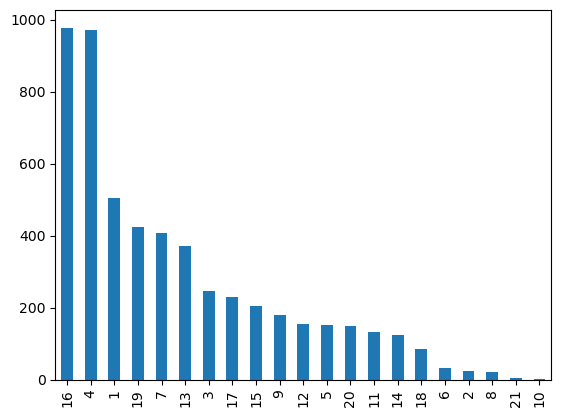

In [6]:
bar_highincomewithparents_populardept = highincomewithparents['department_id'].value_counts().plot.bar()

In [27]:
bar_highincomewithparents_populardept.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_highincomewithparents_populardept.png'))

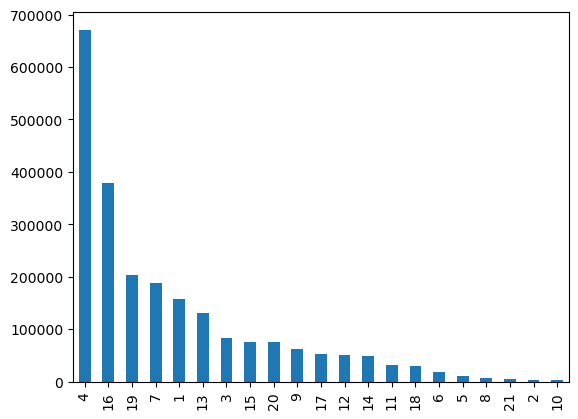

In [8]:
bar_marriedwithkids_populardept = marriedwithkids['department_id'].value_counts().plot.bar()

In [28]:
bar_marriedwithkids_populardept.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_marriedwithkids_populardept.png'))

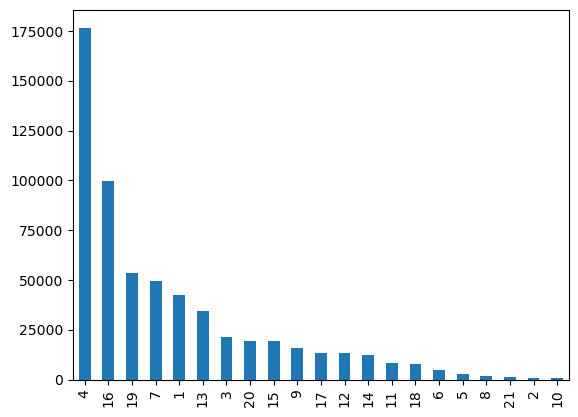

In [9]:
bar_singleretirees_populardept = singleretirees['department_id'].value_counts().plot.bar()

In [29]:
bar_singleretirees_populardept.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_singleretirees_populardept.png'))

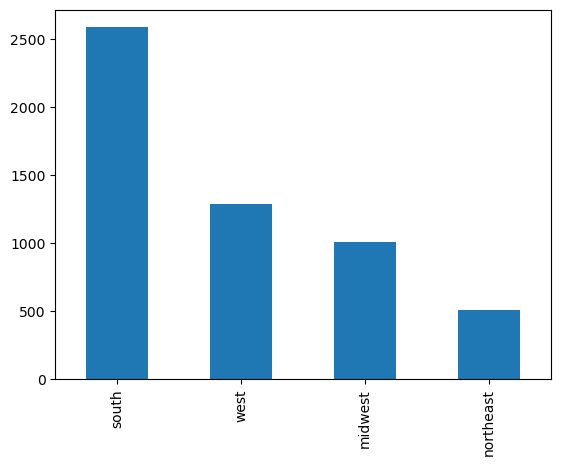

In [10]:
bar_highincomewithparents_region = highincomewithparents['region_flag'].value_counts().plot.bar()

In [30]:
bar_highincomewithparents_region.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_highincomewithparents_region.png'))

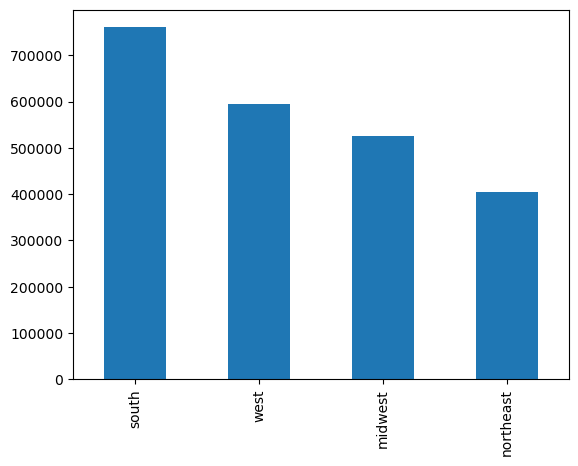

In [11]:
bar_marriedwithkids_region = marriedwithkids['region_flag'].value_counts().plot.bar()

In [31]:
bar_marriedwithkids_region.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_marriedwithkids_region.png'))

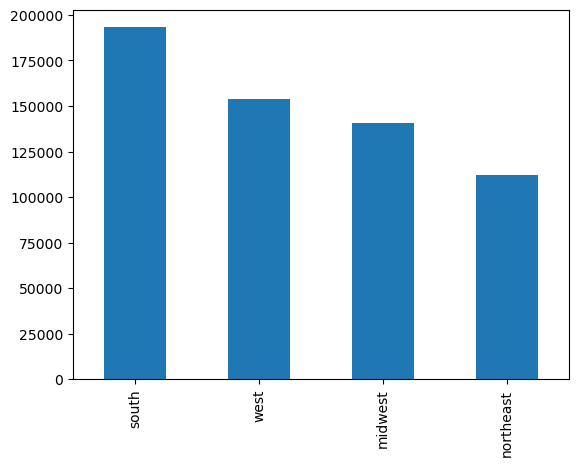

In [12]:
bar_singleretirees_region = singleretirees['region_flag'].value_counts().plot.bar()

In [32]:
bar_singleretirees_region.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_singleretirees_region.png'))

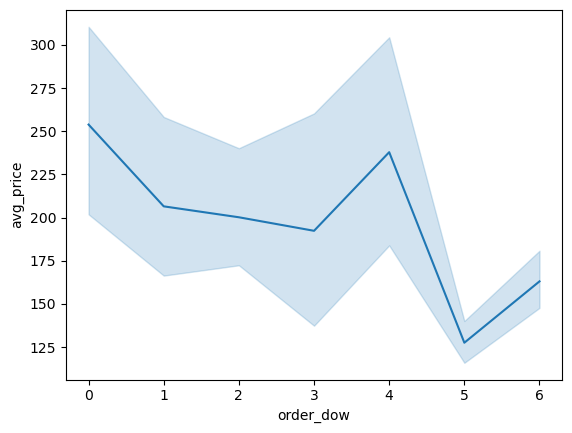

In [28]:
line_highincomewithparents_dayofweek_prices = sns.lineplot(data = df_highincomewithparents, x = 'order_dow',y = 'avg_price')

In [29]:
line_highincomewithparents_dayofweek_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_highincomewithparents_dayofweek_prices.png'))

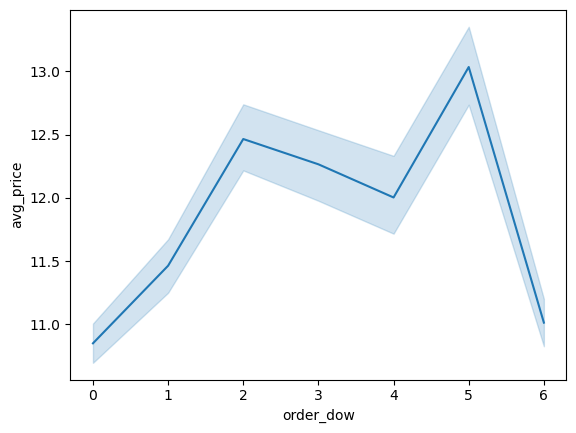

In [32]:
line_marriedwithkids_dayofweek_prices = sns.lineplot(data = df_marriedwithkids, x = 'order_dow',y = 'avg_price')

In [33]:
line_marriedwithkids_dayofweek_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_marriedwithkids_dayofweek_prices.png'))

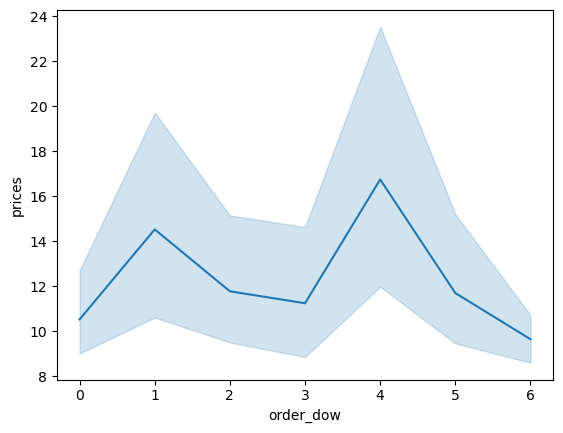

In [13]:
line_singleretirees_dayofweek_prices = sns.lineplot(data = singleretirees, x = 'order_dow',y = 'prices')

In [35]:
line_singleretirees_dayofweek_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_singleretirees_dayofweek_prices.png'))

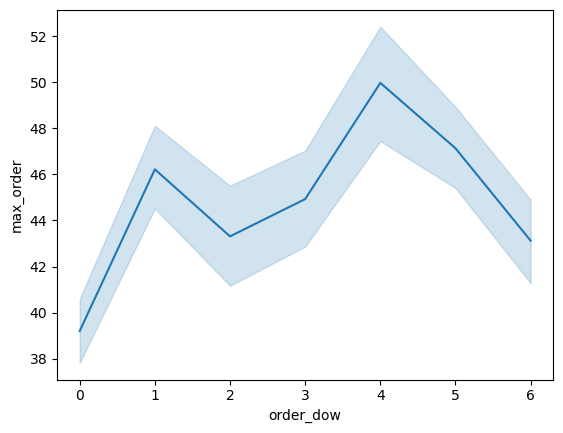

In [17]:
line_highincomewithparents_dayofweek_orders = sns.lineplot(data = highincomewithparents, x = 'order_dow',y = 'max_order')

In [36]:
line_highincomewithparents_dayofweek_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_highincomewithparents_dayofweek_orders.png'))

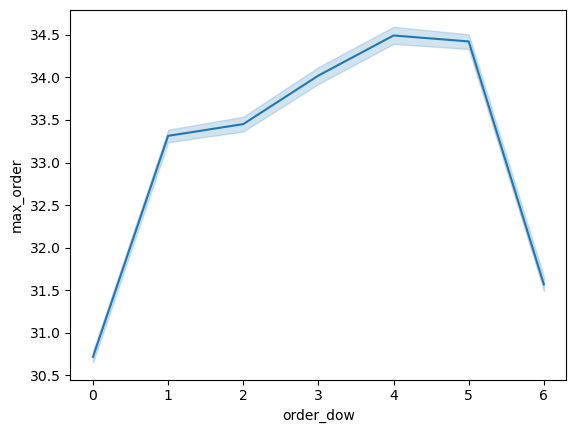

In [18]:
line_marriedwithkids_dayofweek_orders = sns.lineplot(data = marriedwithkids, x = 'order_dow',y = 'max_order')

In [37]:
line_marriedwithkids_dayofweek_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_marriedwithkids_dayofweek_orders.png'))

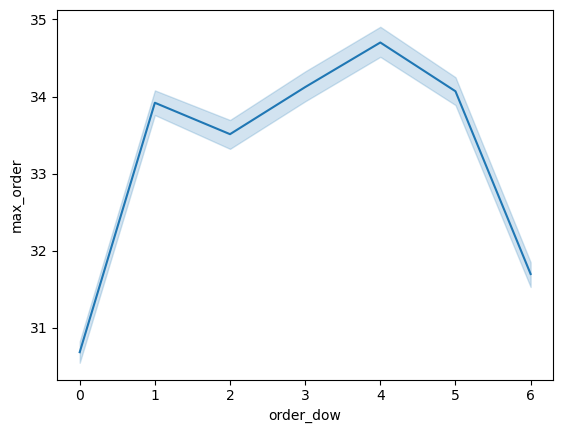

In [19]:
line_singelretirees_dayofweek_orders = sns.lineplot(data = singleretirees, x = 'order_dow',y = 'max_order')

In [38]:
line_singelretirees_dayofweek_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_singelretirees_dayofweek_orders.png'))

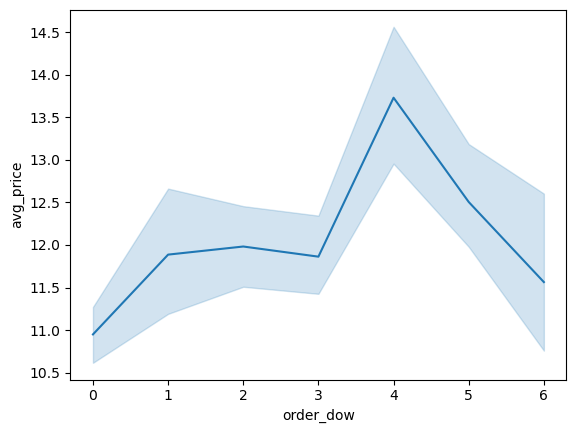

In [35]:
line_singelretirees_dayofweek_prices = sns.lineplot(data = df_singleretirees, x = 'order_dow',y = 'avg_price')

In [36]:
line_singelretirees_dayofweek_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_singleretirees_dayofweek_prices.png'))

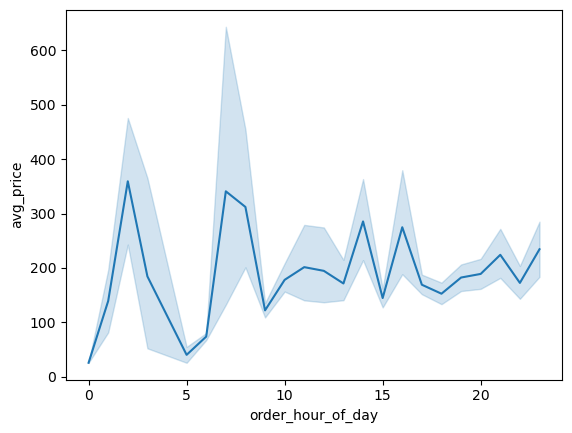

In [37]:
line_highincomewithparents_hourofday_prices = sns.lineplot(data = df_highincomewithparents, x = 'order_hour_of_day',y = 'avg_price')

In [38]:
line_highincomewithparents_hourofday_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_highincomewithparents_hourofday_prices.png'))

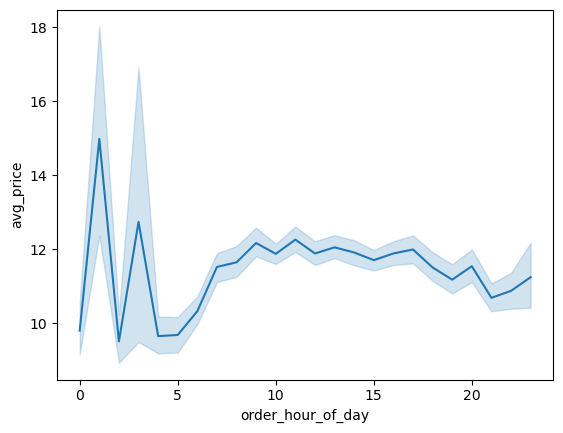

In [39]:
line_marriedwithkids_hourofday_prices = sns.lineplot(data = df_marriedwithkids, x = 'order_hour_of_day',y = 'avg_price')

In [40]:
line_marriedwithkids_hourofday_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_marriedwithkids_hourofday_prices.png'))

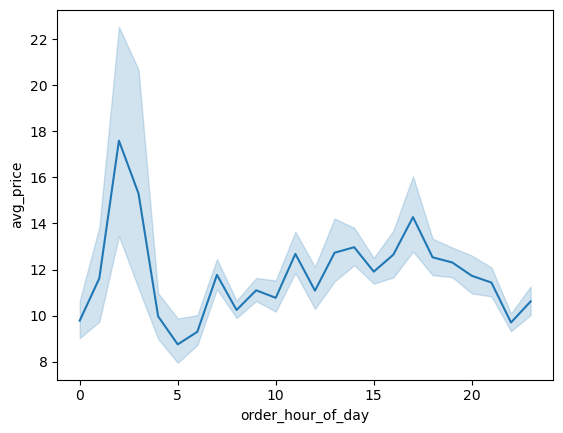

In [41]:
line_singleretirees_hourofday_prices = sns.lineplot(data = df_singleretirees, x = 'order_hour_of_day',y = 'avg_price')

In [42]:
line_singleretirees_hourofday_prices.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_singleretirees_hourofday_prices.png'))

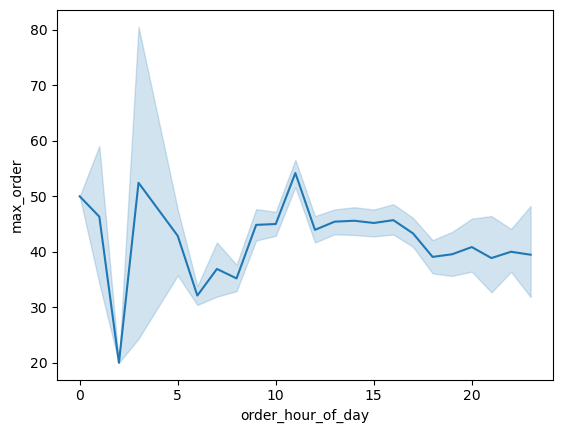

In [24]:
line_highincomewithparents_hourofday_orders = sns.lineplot(data = highincomewithparents, x = 'order_hour_of_day',y = 'max_order')

In [42]:
line_highincomewithparents_hourofday_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_highincomewithparents_hourofday_orders.png'))

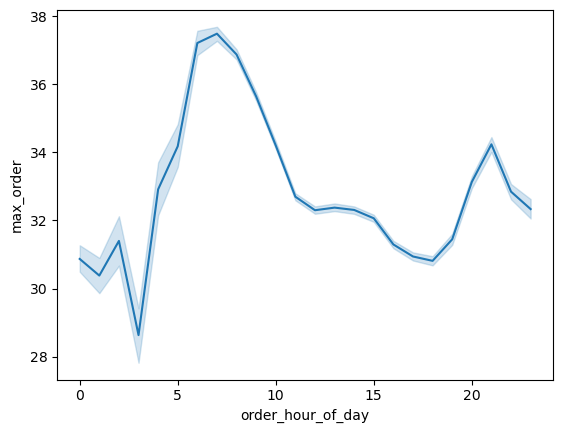

In [25]:
line_marriedwithkids_hourofday_orders = sns.lineplot(data = marriedwithkids, x = 'order_hour_of_day',y = 'max_order')

In [43]:
line_marriedwithkids_hourofday_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_marriedwithkids_hourofday_orders.png'))

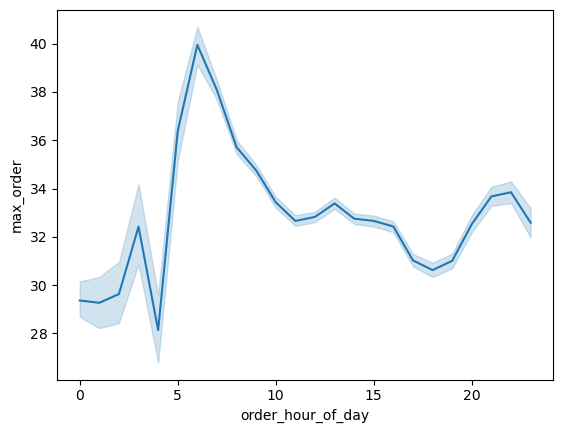

In [26]:
line_singleretirees_hourofday_orders = sns.lineplot(data = singleretirees, x = 'order_hour_of_day',y = 'max_order')

In [44]:
line_singleretirees_hourofday_orders.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_singleretirees_hourofday_orders.png'))